<div style="color:white; background-color: black; padding: 20px; border-radius:8px; font-size:26px"><b style="font-weight: 700;"><center>MOTHER JONES US MASS SHOOTINGS </center></b></div>

<div style="background-color:  #eddcd2; padding: 10px;">

### Data

</div>

US Mass Shootings, 1982–2023: Data From Mother Jones’ Investigation.

The source and description of the data: [here](https://www.kaggle.com/datasets/joebeachcapital/mother-jones-us-mass-shootings-weekly-updates/data)

In [2]:
import pandas as pd
import numpy as np                          # for working with arrays and matrices

pd.set_option('display.max_rows', 500)      # Set max number of rows displayed
pd.set_option('display.max_columns', 500)   # Set max number of columns displayed
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# <a id='2'>Reading Data </a>


In [3]:
# load the data
df = pd.read_csv("D:/git/Laboratory/NLP/MJ US Mass Shootings/data/US_Mass_Shootings.csv", na_values=np.nan)
display(df.head(10))

print(df.shape)

print(df.iloc[1,:])

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Maine bowling alley and restaurant shootings,"Lewiston, Maine",10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,21,Other,40,yes,"Card reportedly spoke of ""hearing voices"" and ...",-,Yes,semiautomatic rifle,AR-15-style rifle (Rugar SFAR),White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023
1,Jacksonville Dollar General store shooting,"Jacksonville, Florida",8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,Palmeter was evaluated under Florida's Baker A...,yes,local gun stores,"semiautomatic rifle, semiautomatic handgun",AR-15-style rifle; Glock pistol,White,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023
2,Orange County biker bar shooting,"Trabuco Canyon, California",8/23/23,"John Snowling, 59, a retired sergeant from the...",3,6,9,Other,59,-,-,-,-,semiautomatic handguns; shotgun,-,White,M,https://www.ocregister.com/2023/08/24/cooks-co...,-,-,-,-,mass,2023
3,Philidelphia neighborhood shooting,"Philadelphia, Pennsylvania",7/3/23,"Kimbrady Carriker, 40, wearing a ski mask and ...",5,2,7,Other,40,yes,The perpetrator reportedly posted disturbing c...,yes,-,"semiautomatic rifle, semiautomatic handgun",AR-15-style rifle,Black,M,https://6abc.com/philly-mass-shooting-suspect-...,https://6abc.com/philly-mass-shooting-suspect-...,-,-,-,mass,2023
4,New Mexico neighborhood shooting,"Farmington, New Mexico",5/15/23,"Beau Wilson, 18, opened fire in a residential ...",3,6,9,Other,18,yes,-,yes,-,semiautiomatic rifle; semiautomatic pistol,AR-15-style rifle,White,M,https://www.cbsnews.com/news/farmington-shooti...,https://www.nbcnews.com/news/us-news/beau-wils...,-,-,-,mass,2023
5,Texas outlet mall shooting,"Allen, Texas",5/6/23,"Mauricio Garcia, 33, wore tactical gear and us...",8,7,15,Other,33,yes,Reportedly had a history of mental health prob...,yes,-,semiautomatic rifle,AR-15-style rifle,Latino,M,https://www.nytimes.com/2023/05/07/us/texas-ma...,-,-,-,-,Mass,2023
6,Louisville bank shooting,"Louisville, Kentucky",4/10/23,"Connor Sturgeon, 25, opened fire inside Old Na...",5,8,13,workplace,25,yes,-,yes,gun dealership in Louisville,semiautomatic rifle,AR-15 rifle,White,M,https://apnews.com/article/downtown-louisville...,-,-,-,-,Mass,2023
7,Nashville Christian school shooting,"Nashville, Tennessee",3/27/23,"Audrey Hale, 28, who was a former student at t...",6,6,12,School,28,-,-,yes,-,"semiautomatic rifle, semiautomatic handgun",-,White,"F (""identifies as transgender"" and ""Audrey Hal...",https://www.tennessean.com/story/news/crime/20...,-,-,-,-,Mass,2023
8,Michigan State University shooting,"East Lansing, Michigan",2/13/23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,-,yes,-,semiautomatic handguns,-,Black,M,https://www.cnn.com/us/live-news/michigan-stat...,-,-,-,-,Mass,2023
9,Half Moon Bay spree shooting,"Half Moon Bay, California",1/23/23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,-,-,-,semiautomatic handgun,-,Asian,M,https://www.cnn.com/us/live-news/half-moon-bay...,-,-,-,-,Spree,2023


(148, 24)
case                                       Jacksonville Dollar General store shooting
location                                                        Jacksonville, Florida
date                                                                          8/26/23
summary                             Ryan Palmeter, 21, outfitted in body armor, fa...
fatalities                                                                          3
injured                                                                             0
total_victims                                                                       3
location.1                                                                  workplace
age_of_shooter                                                                     21
prior_signs_mental_health_issues                                                  yes
mental_health_details               Palmeter was evaluated under Florida's Baker A...
weapons_obtained_legally                    

# Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              148 non-null    object
 1   location                          148 non-null    object
 2   date                              148 non-null    object
 3   summary                           148 non-null    object
 4   fatalities                        148 non-null    int64 
 5   injured                           148 non-null    int64 
 6   total_victims                     148 non-null    int64 
 7   location.1                        148 non-null    object
 8   age_of_shooter                    148 non-null    object
 9   prior_signs_mental_health_issues  148 non-null    object
 10  mental_health_details             148 non-null    object
 11  weapons_obtained_legally          148 non-null    object
 12  where_obtained        

In [5]:
df = df.rename(columns = {'location.1': 'place'})

Despite the summary shows no presence of nan values, this dataset is quite "dirty". I will divide the data into:
 1. Text Data
 2. Numerical Data
 3. Categorical Data

I will clean and preprocess each set of columns to finally locate them into a final dataframe that I will use for developing the models I will use.

# 1. Data Cleaning and Preprocessing

## Target

**Labeling**:
    - Ensure to have a column with labels indicating the categories or classes for classification.
        - Column: *type*

In [6]:
df['type'].value_counts()

type
Mass     122
Spree     22
mass       4
Name: count, dtype: int64

In [7]:
def target_cleaning(df):

    df['type'].replace(to_replace = ['Mass'],
                       value = 'mass',
                       inplace = True)

    df['type'] = df['type'].str.lower()

    return df

In [8]:
df = target_cleaning(df)

df['type'].value_counts()

type
mass     126
spree     22
Name: count, dtype: int64

4. **Save cleaned dataset**

In [9]:
import pickle

file_path = 'df_target_cleaned.pkl'           # <--- Define a file path and name

with open(file_path, 'wb') as file:
    pickle.dump(df['type'], file)

## 1.1 Text Data

Text Data:
- case
- location
- summary
- mental_health_details
- where_obtained
- weapon_type
- weapon_details
- sources
- mental_health_sources
- sources_additional_age
- place
- race

In [10]:
# Select the text columns in the dataset

df_text = df[['case', 'location', 'summary', 'mental_health_details', 'where_obtained', 'weapon_type', 'weapon_details', 'sources', 'mental_health_sources', 'sources_additional_age', 'place', 'race']]

In [11]:
df_text

,case,location,summary,mental_health_details,where_obtained,weapon_type,weapon_details,sources,mental_health_sources,sources_additional_age,place,race
0,Maine bowling alley and restaurant shootings,"Lewiston, Maine","Robert Card, 40, an Army reservist and firearm...","Card reportedly spoke of ""hearing voices"" and ...",Yes,semiautomatic rifle,AR-15-style rifle (Rugar SFAR),https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,Other,White
1,Jacksonville Dollar General store shooting,"Jacksonville, Florida","Ryan Palmeter, 21, outfitted in body armor, fa...",Palmeter was evaluated under Florida's Baker A...,local gun stores,"semiautomatic rifle, semiautomatic handgun",AR-15-style rifle; Glock pistol,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,workplace,White
2,Orange County biker bar shooting,"Trabuco Canyon, California","John Snowling, 59, a retired sergeant from the...",-,-,semiautomatic handguns; shotgun,-,https://www.ocregister.com/2023/08/24/cooks-co...,-,-,Other,White
3,Philidelphia neighborhood shooting,"Philadelphia, Pennsylvania","Kimbrady Carriker, 40, wearing a ski mask and ...",The perpetrator reportedly posted disturbing c...,-,"semiautomatic rifle, semiautomatic handgun",AR-15-style rifle,https://6abc.com/philly-mass-shooting-suspect-...,https://6abc.com/philly-mass-shooting-suspect-...,-,Other,Black
4,New Mexico neighborhood shooting,"Farmington, New Mexico","Beau Wilson, 18, opened fire in a residential ...",-,-,semiautiomatic rifle; semiautomatic pistol,AR-15-style rifle,https://www.cbsnews.com/news/farmington-shooti...,https://www.nbcnews.com/news/us-news/beau-wils...,-,Other,White
5,Texas outlet mall shooting,"Allen, Texas","Mauricio Garcia, 33, wore tactical gear and us...",Reportedly had a history of mental health prob...,-,semiautomatic rifle,AR-15-style rifle,https://www.nytimes.com/2023/05/07/us/texas-ma...,-,-,Other,Latino
6,Louisville bank shooting,"Louisville, Kentucky","Connor Sturgeon, 25, opened fire inside Old Na...",-,gun dealership in Louisville,semiautomatic rifle,AR-15 rifle,https://apnews.com/article/downtown-louisville...,-,-,workplace,White
7,Nashville Christian school shooting,"Nashville, Tennessee","Audrey Hale, 28, who was a former student at t...",-,-,"semiautomatic rifle, semiautomatic handgun",-,https://www.tennessean.com/story/news/crime/20...,-,-,School,White
8,Michigan State University shooting,"East Lansing, Michigan","Anthony D. McRae, 43, opened fire at Berkey Ha...",-,-,semiautomatic handguns,-,https://www.cnn.com/us/live-news/michigan-stat...,-,-,School,Black
9,Half Moon Bay spree shooting,"Half Moon Bay, California","Chunli Zhao, 67, suspected of carrying out the...",-,-,semiautomatic handgun,-,https://www.cnn.com/us/live-news/half-moon-bay...,-,-,workplace,Asian


Before the initial cleaning, I will check the unique values for each text column.

In [12]:
df_text['case'].value_counts()

case
Maine bowling alley and restaurant shootings     1
Seal Beach shooting                              1
Tucson shooting                                  1
Hartford Beer Distributor shooting               1
Coffee shop police killings                      1
Fort Hood massacre                               1
Binghamton shootings                             1
Carthage nursing home shooting                   1
Atlantis Plastics shooting                       1
Northern Illinois University shooting            1
Kirkwood City Council shooting                   1
Westroads Mall shooting                          1
Crandon shooting                                 1
Virginia Tech massacre                           1
Trolley Square shooting                          1
Amish school shooting                            1
Capitol Hill massacre                            1
IHOP shooting                                    1
Su Jung Health Sauna shooting                    1
Jacksonville Dollar Genera

In [13]:
df_text['location'].value_counts()

location
Colorado Springs, Colorado              3
Dallas, Texas                           2
Seattle, Washington                     2
Aurora, Colorado                        2
Atlanta, Georgia                        2
San Francisco, California               2
Orlando, Florida                        2
Fort Lauderdale, Florida                2
Orange, California                      2
Nashville, Tennessee                    2
Louisville, Kentucky                    2
Jacksonville, Florida                   2
Fort Hood, Texas                        2
Henderson, Kentucky                     1
Carthage, North Carolina                1
Binghamton, New York                    1
Seal Beach, California                  1
Parkland, Washington                    1
Manchester, Connecticut                 1
Tucson, Arizona                         1
DeKalb, Illinois                        1
Carson City, Nevada                     1
Kirkwood, Missouri                      1
Lewiston, Maine          

In [14]:
df_text['summary'].value_counts()

summary
Robert Card, 40, an Army reservist and firearms instructor, opened fire in the two locations, then fled and became the focus of an intensive manhunt. He was found two days later, dead from a self-inflicted gunshot.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
Scott Evans Dekraai, 42, opened fire inside a hair salon and was later arreste

In [15]:
df_text['mental_health_details'].value_counts()

mental_health_details
-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              45
Unclear                                                                                                                                                                                                                                                                                                                                                         

I will replace the '-' and 'Unclear' with a whitespace


In [16]:
df_text['where_obtained'].value_counts()

where_obtained
-                                                                                                                               50
Unknown                                                                                                                         15
Unclear                                                                                                                          4
TBD                                                                                                                              3
Purchased from an individual                                                                                                     2
Yes                                                                                                                              1
Glock and Remington stolen from grandfather                                                                                      1
Hunting Supplies of Hawaii (The Armory) in Honolulu, Hawaii         

I will replace the '-', 'Unknown' and 'Unclear' with a whitespace


In [17]:
df_text['weapon_type'].value_counts()

weapon_type
One semiautomatic handgun                                                                                                                                                                                                                                                                                                                                                                                18
semiautomatic rifle                                                                                                                                                                                                                                                                                                                                                                                      15
semiautomatic handgun                                                                                                                                                                               

In [18]:
df['place'].value_counts()

place
Other          55
Workplace      45
School         22
workplace       7
Religious       7
Military        6
Other\n         3
religious       1
Airport         1
\nWorkplace     1
Name: count, dtype: int64

- Replace 'Other\n' and 'Other' by ' '
- Replace 'workplace' and '\nWorkplace' by 'Workplace'
- Replace 'Religious' by 'religious'
- Lower case all categories left

In [19]:
df['race'].value_counts()

race
white              41
White              37
Black              17
Latino             12
-                  12
Asian              10
black               9
Other               5
Native American     3
White               1
unclear             1
Name: count, dtype: int64

- Replace 'White', 'White ' by 'white'
- Replace 'Black' by 'black'
- Replace 'Native American' by 'native_american'
- Replace '-', 'unclear', and 'Other' by ' '
- Lower case all categories left

I will drop (they can be added in case of need) the columns 'sources', 'mental_health_sources', 'sources_additional_age' and 'weapons_details'.

1. **Data Preparation**
    - Identify the columns that contain relevant text data. I select the columns:
        - *case*
        - *location*
        - *summary*
        - *mental_health_details*
        - *where_obtained*
        - *weapon_type*
        - *place*
        - *race*

In [20]:
def text_cleaning(df):

    # REDUCING CATEGORIES

    # 'mental_health_details' ---------------------------------------------------------------------------
    df['mental_health_details'].replace(to_replace = ['-', 'Unclear'],
                                        value = ' ',
                                        inplace = True)

    # 'where_obtained' ---------------------------------------------------------------------------
    df['where_obtained'].replace(to_replace = ['-', 'Unclear', 'TBD', 'Yes', 'Unknown'],
                                 value = ' ',
                                 inplace = True)

    # 'race' ---------------------------------------------------------------------------------------
    df['race'].replace({'-': ' ',
                        'unclear': ' ',
                        'Other': ' ',
                        'White': 'white',
                        'White ': 'white'},
                        inplace = True)

    # 'place' ----------------------------------------------------------------------------------
    df['place'].replace(to_replace = ['Other\n', 'Other'],
                        value = ' ',
                        inplace = True)

    df['place'].replace(to_replace = ['Workplace', '\nWorkplace'],
                        value = 'workplace',
                        inplace = True)



   # DROPPING UNNECESSARY COLUMNS
    df = df.drop(['sources', 'mental_health_sources', 'sources_additional_age', 'weapon_details'], axis = 1)

    return df

In [21]:
df_text = text_cleaning(df_text)

# df_copy['weapon_details'].value_counts()

In [22]:
df_text[['place', 'race']]

,place,race
0,,white
1,workplace,white
2,,white
3,,Black
4,,white
5,,Latino
6,workplace,white
7,School,white
8,School,Black
9,workplace,Asian


2. **Concatenation or Combination**
    - Concatenate or combine the text from multiple columns into a single column, as long as it makes sense for the classification task.

In [23]:
def combine_text(df):

    df['event_text'] = df['case'] + ' ' + df['location'] + ' ' + df['summary'] + ' ' + df['mental_health_details'] + ' ' + df['where_obtained'] + ' ' + df['weapon_type'] + ' ' + df['place'] + ' ' + df['race']

    df = df.drop(['case', 'location', 'summary', 'mental_health_details', 'where_obtained', 'weapon_type', 'place', 'race'], axis = 1)

    return df

In [24]:
df_text = combine_text(df_text)

df_text.tail(10)

,event_text
138,"Luby's massacre Killeen, Texas George Hennard,..."
139,"GMAC massacre Jacksonville, Florida James Edwa..."
140,"Standard Gravure shooting Louisville, Kentucky..."
141,"Stockton schoolyard shooting Stockton, Califor..."
142,"ESL shooting Sunnyvale, California Former ESL ..."
143,"Shopping centers spree killings Palm Bay, Flor..."
144,"United States Postal Service shooting Edmond, ..."
145,"San Ysidro McDonald's massacre San Ysidro, Cal..."
146,"Dallas nightclub shooting Dallas, Texas Abdelk..."
147,"Welding shop shooting Miami, Florida Junior hi..."


In [25]:
df_text['event_text'][4]

'New Mexico neighborhood shooting Farmington, New Mexico Beau Wilson, 18, opened fire in a residential neighborhood around his home; he shot randomly at people, houses and cars, according to local authorities. A high school student, he wore body armor and used multiple guns, including an "AR-15-style rifle," and was shot dead by responding police.      semiautiomatic rifle; semiautomatic pistol   white'

In [26]:
df.loc[4,'summary']

'Beau Wilson, 18, opened fire in a residential neighborhood around his home; he shot randomly at people, houses and cars, according to local authorities. A high school student, he wore body armor and used multiple guns, including an "AR-15-style rifle," and was shot dead by responding police. '

3. **Text Preprocessing**:
    - Apply **basic text preprocessing** steps to the combined text.
        - *Lowercasing*
        - *Remove URLs*
        - *Remove HTML tags*
        - *Remove Punctuations*
        - *Chat Word Treatment*
        - *Remove emojis*
        - *Remove newlines*
        - *Spelling Correction*

In [27]:
import re
import string

def basic_preproc_text(df):

    # Lowercase text ---------------------------------------------------------
    df['event_text'] = df['event_text'].str.lower()

    # Remove url text --------------------------------------------------------
    def remove_URL(text):
        pattern = re.compile(r'http?://\S+|www\.\S+')
        cleaned_text = pattern.sub(r'', text)
        return cleaned_text

    df['event_text'] = df['event_text'].apply(remove_URL)

    # Remove html text -------------------------------------------------------
    def remove_html(text):
        pattern = re.compile(r'<.*?>')
        cleaned_text = pattern.sub(r'', text)
        return cleaned_text

    df['event_text'] = df['event_text'].apply(remove_html)

    # Remove punctuations ---------------------------------------------------
    def remove_punct(text):
        # table = str.maketrans('','',string.punctuation)
        table = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
        return text.translate(table)

    df['event_text'] = df['event_text'].apply(remove_punct)

    # Remove extra spaces ----------------------------------------------------
    def remove_whitespace(text):
        return ' '.join(text.split())

    df['event_text'] = df['event_text'].apply(remove_whitespace)

    # Chat Word Treatment ----------------------------------------------------
    with open('chat_words_dict.pkl', 'rb') as file:
        chat_words = pickle.load(file)

    def chat_conversion(text):
        new_text = []
        for w in text.split():
            if w.upper() in chat_words:
                new_text.append(chat_words[w.upper()])
            else:
                new_text.append(w)
        return ' '.join(new_text)

    df['event_text'] = df['event_text'].apply(chat_conversion)

    # Remove emojis --------------------------------------------------------
    def remove_emoji(text):
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

        new_text = emoji_pattern.sub(r'', text)
        return new_text

    df['event_text'] = df['event_text'].apply(remove_emoji)

    # Remove newlines --------------------------------------------------------
    def remove_newline(text):
        newline = re.compile(r'\n')
        return newline.sub(r'', text)

    df['event_text'] = df['event_text'].apply(remove_newline)

    return df

In [28]:
df_text = basic_preproc_text(df_text)

df_text['event_text'].tail(10)

FileNotFoundError: [Errno 2] No such file or directory: 'chat_words_dict.pkl'

In [ ]:
df_text.loc[0,'event_text']

In [ ]:
# Spelling Correction ----------------------------------------------------
from textblob import TextBlob

def spelling_correction(text, exceptions):

    # Tokenize the text
    words = text.split()

    # Initialize an empty list to store corrected words
    corrected_words = []

    # Correct each word, except for the specified exception
    for word in words:
        if word in exceptions:
            corrected_words.append(word)
        else:

            # Create a TextBlob object using the word
            textBlb = TextBlob(word)

            corrected_words.append(textBlb.correct().string)         # <--- The correct() method attempts to correct the spelling and grammar of the text. The string() method converts the corrected text in a string

    # Join the corrected words back into a sentence
    corrected_text = ' '.join(corrected_words)

    return corrected_text

In [ ]:
import time

start = time.time()
df_text['event_text'] = df_text['event_text'].apply(spelling_correction, exceptions = ['miami'])
end = time.time() - start
print(end)

In [ ]:
df_text['event_text'].tail(10)

- **Advanced Text Preprocessing**
Function-based Pipeline with the advanced preprocessing methods applied functions (Stop Word Removal and Lemmatization)

1. *Removing Stop Words* (this time Ill use spaCy)
2. *Lemmatization* (this time Ill use spaCy)

    In both methods, since I use the pre-trained models *en_core_web_lg* (I could also use *en_core_web_sm* because the dataset is not large) from spaCy, the Tokenization will be part of each method.

    <u> Notes</u>:
    - *en_core_web_sm* is one of the pre-trained models (tokenizer) provided by spaCy for the English language. It is a small and efficient model that is suitable for a wide range of NLP tasks.
    - *en_core_web_lg*: It's part of the spaCy library and is trained on a large corpus of text. The lg in 'en_core_web_lg' stands for "large", which means this model includes word vectors that capture more nuanced semantic information.

In [ ]:
import spacy

def advanc_preproc_text(df):

    nlp = spacy.load('en_core_web_lg')

    # 1. Remove Stop Words using spaCy -------------------------------------------------
    def remove_stop_words(text):

        processed_text = []

        doc = nlp(text)

        for token in doc:
            if token.is_stop:
                continue
            processed_text.append(token.text)

        return ' '.join(processed_text)

    df['event_text'] = df['event_text'].apply(remove_stop_words)

    # 2. Lemmatization ----------------------------------------------------------------
    def lemma_func(text):

        processed_text = []

        doc = nlp(text)

        for token in doc:
            processed_text.append(token.lemma_)

        return ' '.join(processed_text)

    df['event_text'] = df['event_text'].apply(lemma_func)

    return df

In [ ]:
df_text = advanc_preproc_text(df_text)

df_text.head(10)

4. **Text Visualization**
Word Cloud or bar chart is a good way to quickly view the frequent words in the input.

**Word Cloud**

I will create a Word Cloud visual representation of text data related to **mass shootings** in the United States:

In [29]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [30]:
df_text_temp = pd.concat([df_text,df['type']], axis = 1)
# Create the mask including the rows corresponding to mass shootings in the dataset
mask = df_text_temp['type'] == 'mass'

# Create a single string (or text) by concatenating the 'event_text' column from the rows corresponding to mass shootings. It joins these texts together with a space in between.
mass_shoots = ' '.join(text for text in df_text_temp.loc[mask, 'event_text'])

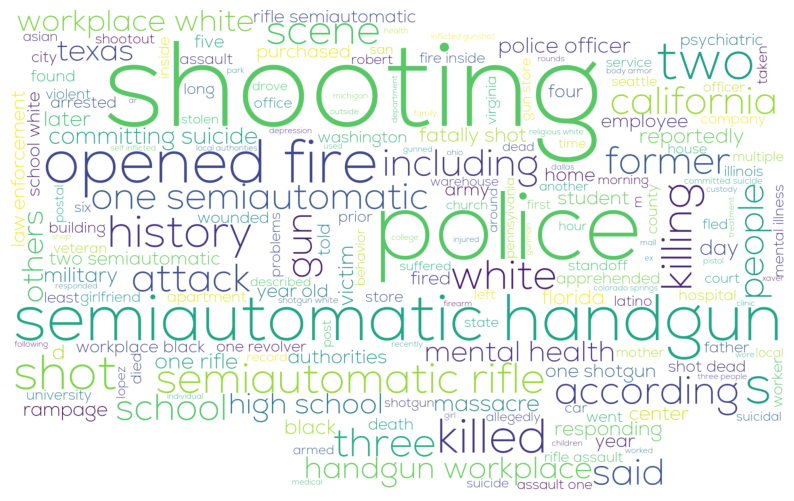

In [31]:
# Specify the path to a font file that will be used for the word cloud visualization. (more fonts can be found in https://www.dafont.com/de/theme.php?cat=501)
font_path = 'D:/git/Laboratory/NLP/MJ US Mass Shootings/fonts/Nexa-ExtraLight.ttf'

# Load the image file (in this case is a USA map) that is used as a mask for the word cloud. The mask determines the shape of the word cloud
mask_image = np.array(Image.open('D:/git/Laboratory/NLP/MJ US Mass Shootings/usa_map.png'))

# Create an instance of the WordCloud class with verious customization options
wc = WordCloud(background_color = 'white',             # set the background color of the WordCloud
               mask = mask_image,                      # specifies the mask (shape) of the WordCloud, which is defined by the loaded image
               font_path = font_path,                  # specifies the font to be used for the WordCloud
               random_state = 42,                      # sets the random state for reproducibility
               width = 1000,                           # with and height sets the dimensions of the WordCloud visualization
               height = 700,
               min_font_size = 20,                     # specifies the minimum and maximum font sizes for the words in the cloud
               max_font_size = 300)

wc.generate(mass_shoots)                               # generates the WordCloud using the text provided

plt.figure(figsize = (10,20))
plt.imshow(wc, interpolation="hamming")                # displays the generated WordCloud. interpolation = 'hamming' is a method for smoothing the image
plt.axis('off')
plt.show()

In [32]:
# Same Wordcloud with customized colors map

# create a function with deseable colors
def multi_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):

    colors = [[4, 77, 82],
              [25, 74, 85],
              [82, 43, 84],
              [158, 48, 79]]

    rand = random_state.randint(0, len(colors) - 1)

    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

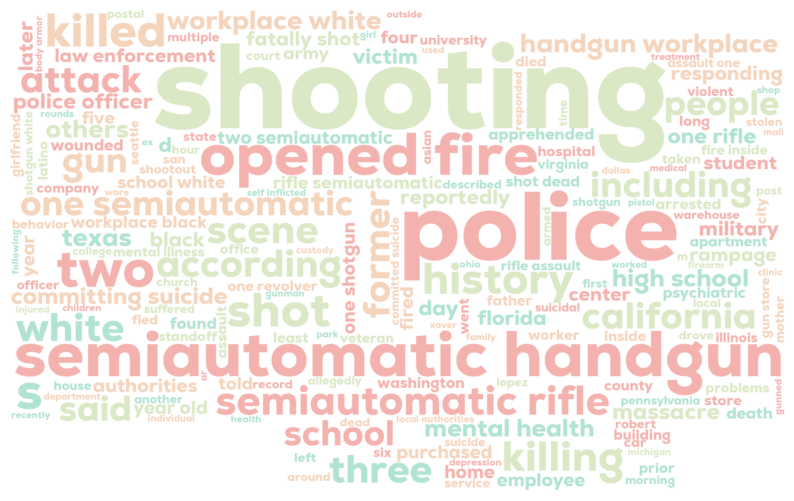

In [33]:
font_path = 'D:/git/Laboratory/NLP/MJ US Mass Shootings/fonts/Nexa-Heavy.ttf'

mask_image = np.array(Image.open('D:/git/Laboratory/NLP/MJ US Mass Shootings/usa_map.png'))

wc = WordCloud(background_color = 'white',
               mask = mask_image,
               font_path = font_path,
               random_state = 42,
               width = 1000,
               height = 1000,
               min_font_size = 20,
               max_font_size = 300,
               color_func = multi_color_func)
wc.generate(mass_shoots)

plt.figure(figsize = (10,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

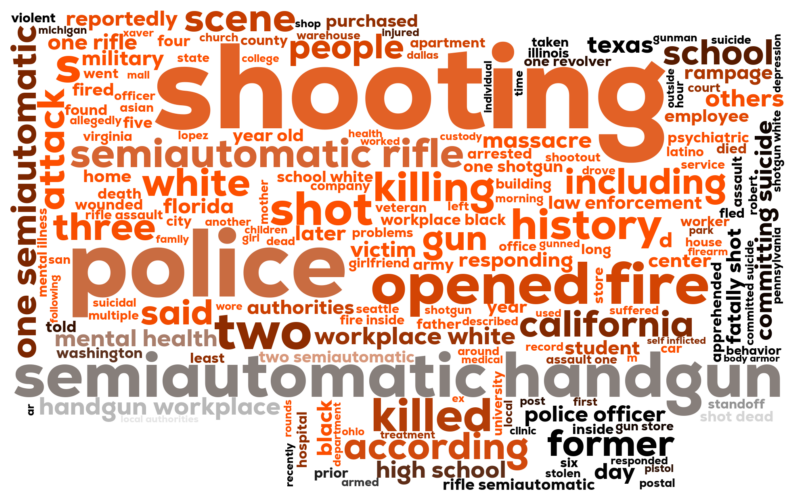

In [34]:
# Same Wordcloud with color based on the mask

from wordcloud import ImageColorGenerator

mask_colors = ImageColorGenerator(mask_image)

wc = WordCloud(background_color = 'white',
               mask = mask_image,
               font_path = font_path,
               random_state = 42,
               width = 1000,
               height = 1000,
               min_font_size = 20,
               max_font_size = 300,
               color_func = mask_colors)
wc.generate(mass_shoots)

plt.figure(figsize = (10,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

I will create a Wordcloud visual representation of text data related to **spree shootings** in the United States:

In [35]:
# Create the mask including the rows corresponding to spree shootings in the dataset
mask = df_text_temp['type'] == 'spree'

spree_shoots = ' '.join(text for text in df_text_temp.loc[mask, 'event_text'])

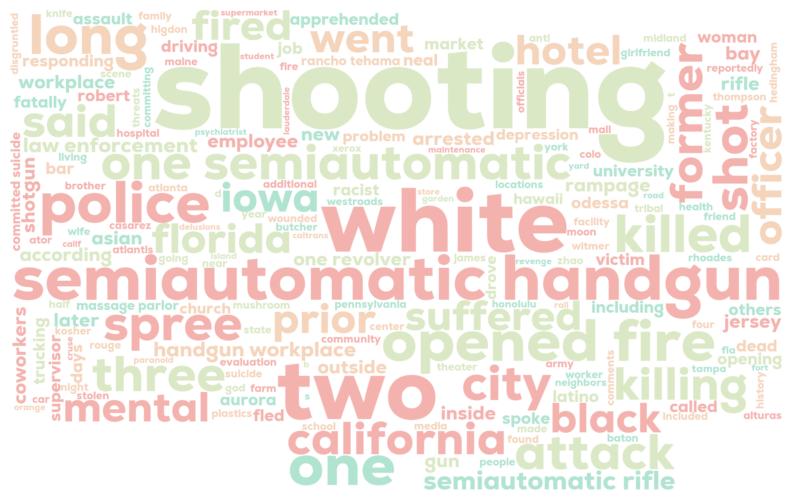

In [36]:
from wordcloud import ImageColorGenerator

mask_colors = ImageColorGenerator(mask_image)

wc = WordCloud(background_color = 'white',
               mask = mask_image,
               font_path = font_path,
               random_state = 42,
               width = 1000,
               height = 1000,
               min_font_size = 20,
               max_font_size = 300,
               color_func = multi_color_func)
wc.generate(spree_shoots)

plt.figure(figsize = (10,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

**Bar Chart**

**Counter** is a class in the **collections** module in Python that is used for *counting the occurrences of elements in an iterable* (e.g., a list, tuple, or string). It returns a *dictionary-like object where keys are the unique elements in the iterable, and values are the corresponding counts of those elements*.

In [37]:
from collections import Counter
from nltk.tokenize import word_tokenize

In [38]:
def bar_chart(df, case):
    corpus = []
    for i in df.index:
        # 1. Tokenize the text (I am using the simplest way: NLTK word_tokenize())
        tokens = [word for word in word_tokenize(df.loc[i,'event_text']) if (word.isalpha()==1)]       #  'if (word.isalpha()==1)' is a conditional statement that checks if the current word (word) consists only of alphabetic characters. The isalpha() method returns True if all characters in the word are alphabetic, and False otherwise.

        # 2 Create a corpus with the tokens
        corpus.extend(tokens)

    # ----------------------------------------------------------------

    print("The number of all words: {}".format(len(corpus)))

    # Create Counter
    counts = Counter(corpus)
    print('The number of unique words: {}'.format(len(counts)))

    # Bar chart ------------------------------------------------------
    most = counts.most_common()[:20]
    x,y = [], []
    for word, count in most:
        x.append(word)
        y.append(count)

    plt.figure(figsize = (12,10))
    sns.barplot(x = y,
                y = x)

    plt.title('Most frequent words for {}'.format(case))
    plt.show()

The number of all words: 10695
The number of unique words: 2378


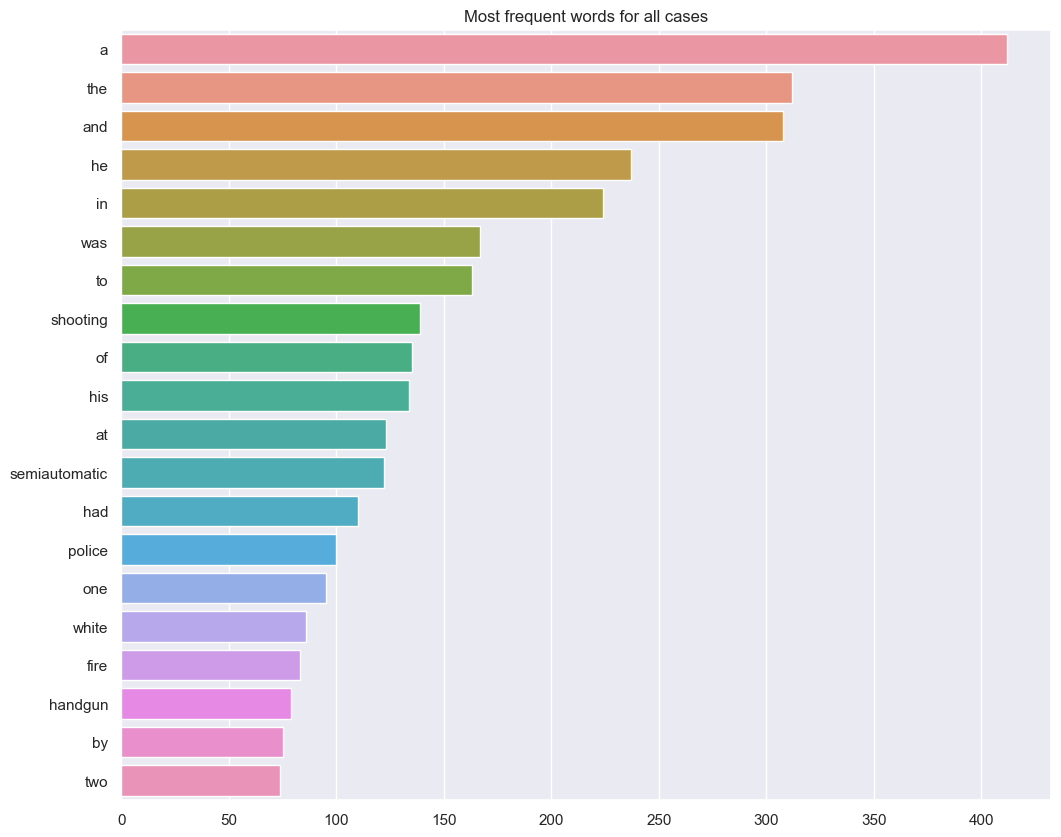

In [39]:
bar_chart(df_text_temp, 'all cases')

The number of all words: 9179
The number of unique words: 2169


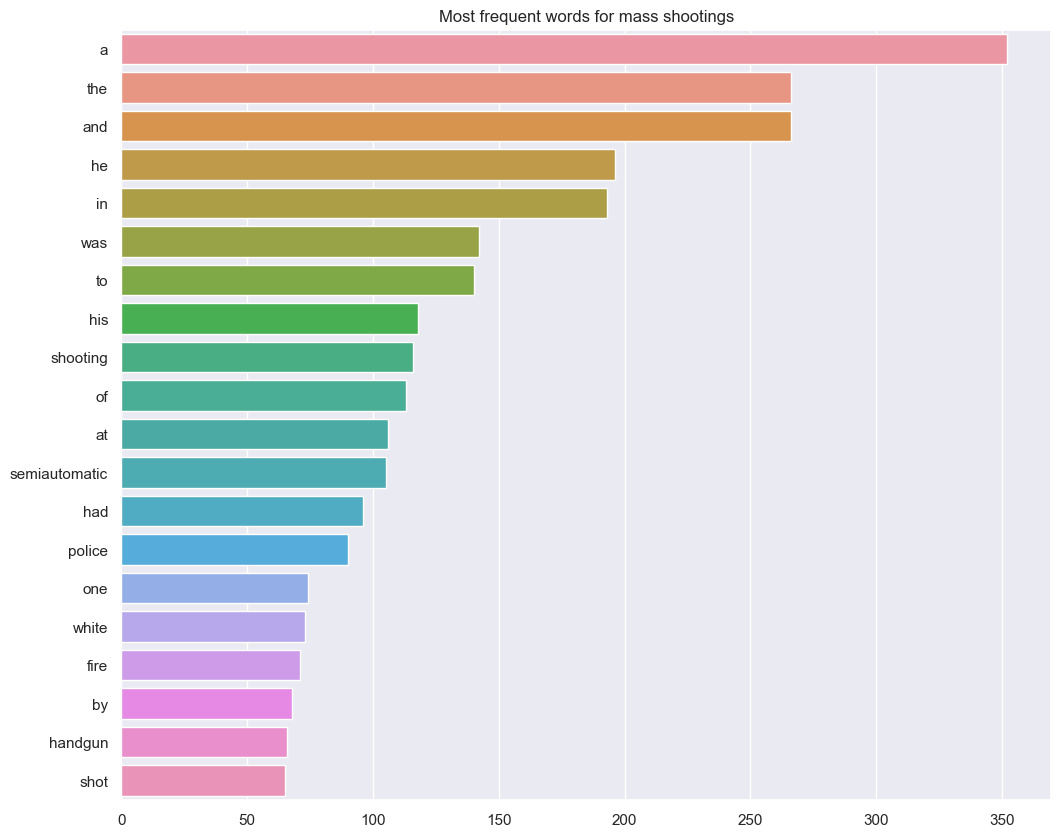

In [40]:
bar_chart(df_text_temp.loc[df_text_temp['type'] == 'mass',:], 'mass shootings')

The number of all words: 1516
The number of unique words: 603


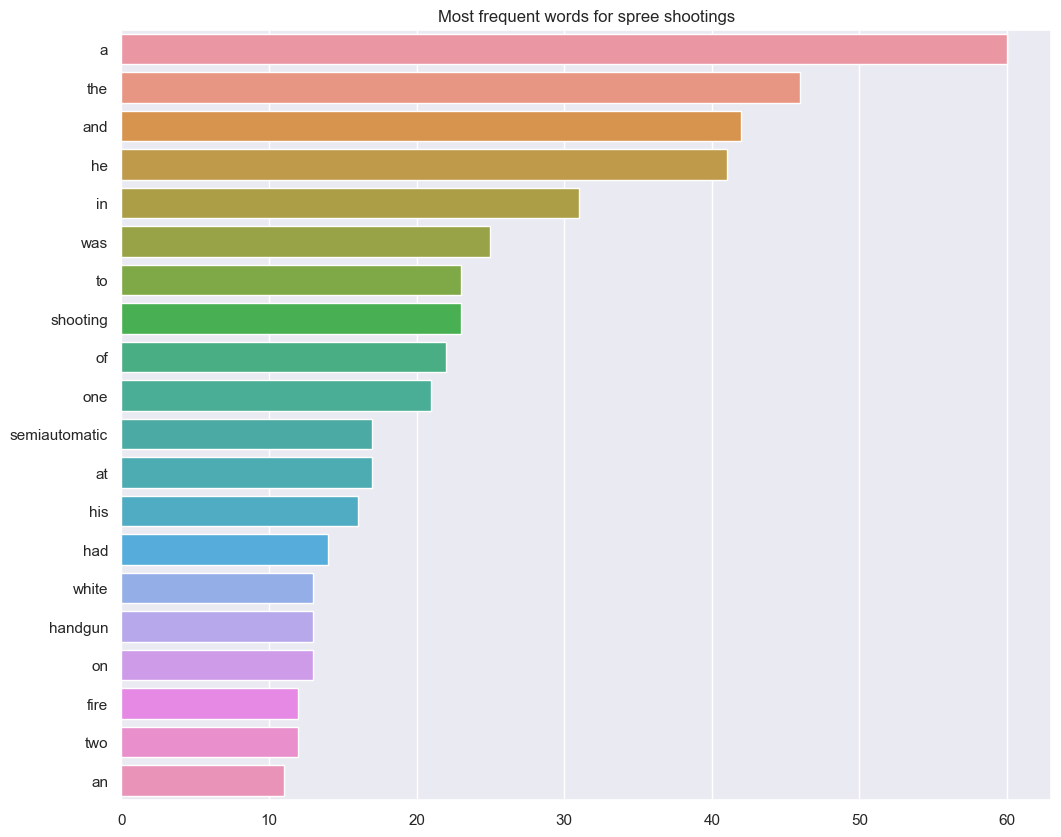

In [41]:
bar_chart(df_text_temp.loc[df_text_temp['type'] == 'spree',:], 'spree shootings')

4. **Save cleaned dataset**

In [42]:
file_path = 'df_text_cleaned.pkl'           # <--- Define a file path and name

with open(file_path, 'wb') as file:
    pickle.dump(df_text, file)

## 1.2 Numerical Data

Numerical Data:
- fatalities
- injured
- total_victims
- age_of_shooter
- date (it is datetime type, but I will convert it into numerical columns)
- latitude
- longitude
- year

In [43]:
# Select the text columns in the dataset

df_num = df[['fatalities', 'injured', 'total_victims', 'age_of_shooter', 'date', 'latitude', 'longitude', 'year']]

1. **Data Overview**

In [44]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fatalities      148 non-null    int64 
 1   injured         148 non-null    int64 
 2   total_victims   148 non-null    int64 
 3   age_of_shooter  148 non-null    object
 4   date            148 non-null    object
 5   latitude        148 non-null    object
 6   longitude       148 non-null    object
 7   year            148 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 9.4+ KB


In [45]:
df_num

,fatalities,injured,total_victims,age_of_shooter,date,latitude,longitude,year
0,18,13,21,40,10/25/23,-,-,2023
1,3,0,3,21,8/26/23,-,-,2023
2,3,6,9,59,8/23/23,-,-,2023
3,5,2,7,40,7/3/23,-,-,2023
4,3,6,9,18,5/15/23,-,-,2023
5,8,7,15,33,5/6/23,-,-,2023
6,5,8,13,25,4/10/23,-,-,2023
7,6,6,12,28,3/27/23,-,-,2023
8,3,5,8,43,2/13/23,-,-,2023
9,7,1,8,67,1/23/23,-,-,2023


2. **Data Wrangling and Cleaning**

In [46]:
from sklearn.impute import SimpleImputer

def num_cleaning(df):

    # 1- Replace the '-' with nan values for all columns
    df = df.replace('-', np.nan)

    # 2- Get the day and month from the 'date' column
    # Split the date and extract month and day
    df[['month', 'day', 'year2']] = df['date'].str.split('/', expand = True)         # The expand=True parameter creates separate columns for each component.

    # Drop the column 'year2' because is already given
    df = df.drop(['year2', 'date'], axis = 1)

    # 3- Convert to float the columns 'age_of_shooter', 'month', 'day', 'age_of_shooter', 'latitude', and 'longitude'
    for col in ['age_of_shooter', 'month', 'day', 'latitude', 'longitude']:
        df[col] = df[col].astype('float')

    # 4- Missing Values
    print(df.isna().sum())

    # Imputing the missing values in 'age_of_shooter', 'latitude' and 'longitude' with the median
    imputer = SimpleImputer(strategy = 'median')

    df = pd.DataFrame(imputer.fit_transform(df),
                      columns = df.columns)

    return df

In [47]:
df_num = num_cleaning(df_num)

fatalities         0
injured            0
total_victims      0
age_of_shooter     2
latitude          22
longitude         22
year               0
month              0
day                0
dtype: int64


In [48]:
print(df_num.isna().sum())

fatalities        0
injured           0
total_victims     0
age_of_shooter    0
latitude          0
longitude         0
year              0
month             0
day               0
dtype: int64


In [49]:
df_num

,fatalities,injured,total_victims,age_of_shooter,latitude,longitude,year,month,day
0,18.0,13.0,21.0,40.0,38.323367,-90.874832,2023.0,10.0,25.0
1,3.0,0.0,3.0,21.0,38.323367,-90.874832,2023.0,8.0,26.0
2,3.0,6.0,9.0,59.0,38.323367,-90.874832,2023.0,8.0,23.0
3,5.0,2.0,7.0,40.0,38.323367,-90.874832,2023.0,7.0,3.0
4,3.0,6.0,9.0,18.0,38.323367,-90.874832,2023.0,5.0,15.0
5,8.0,7.0,15.0,33.0,38.323367,-90.874832,2023.0,5.0,6.0
6,5.0,8.0,13.0,25.0,38.323367,-90.874832,2023.0,4.0,10.0
7,6.0,6.0,12.0,28.0,38.323367,-90.874832,2023.0,3.0,27.0
8,3.0,5.0,8.0,43.0,38.323367,-90.874832,2023.0,2.0,13.0
9,7.0,1.0,8.0,67.0,38.323367,-90.874832,2023.0,1.0,23.0


3. **Data Visualization**
    I will create some visualizations to check for specific patterns in the numerical data. A more detail analysis can be performed, but at the moment I will create the following plots:
    - Pairplot to have a general overview
    - Correlation matrix heatmap to check for collinearity between numerical variables
    - Scatter plot with latitute and longitude to check for some pattern in the locations

In [50]:
df_num_temp = pd.concat([df_num,df['type']], axis = 1)

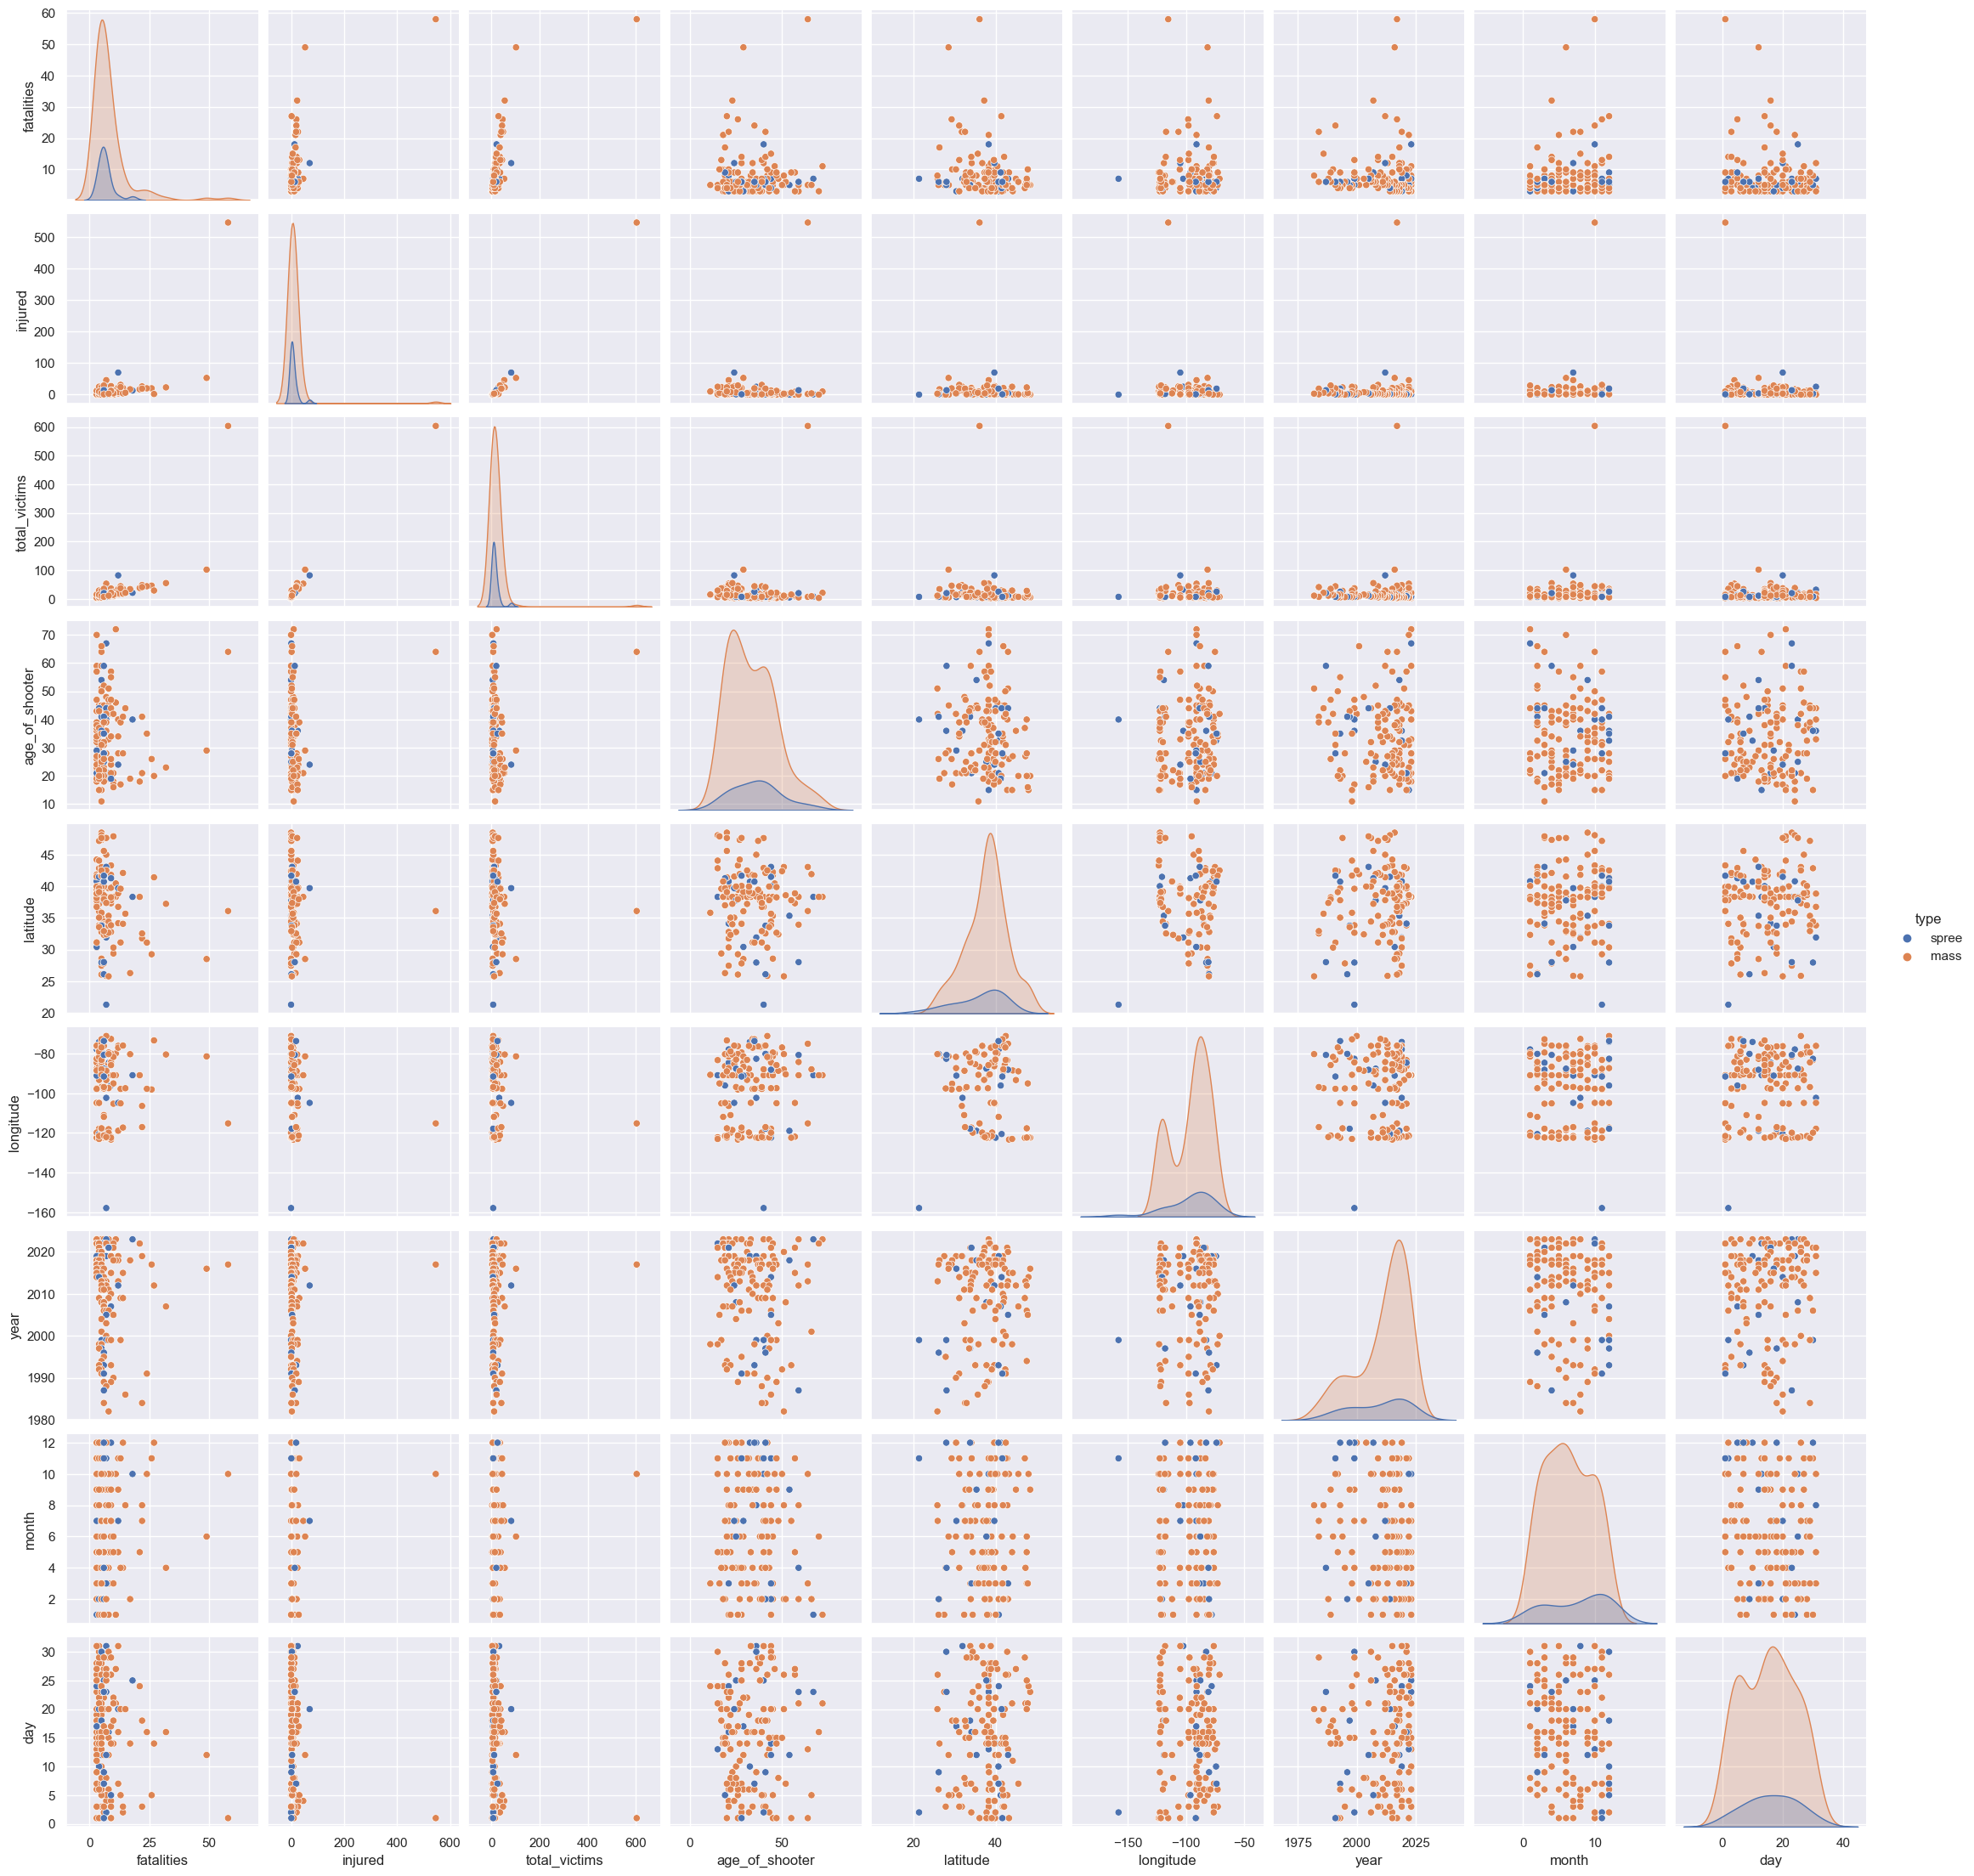

In [51]:
import seaborn as sns
sns.set(style="darkgrid")

# Plot the Pairplot with hue 'booking_status'
sns.pairplot(df_num_temp, hue = 'type')
plt.show()

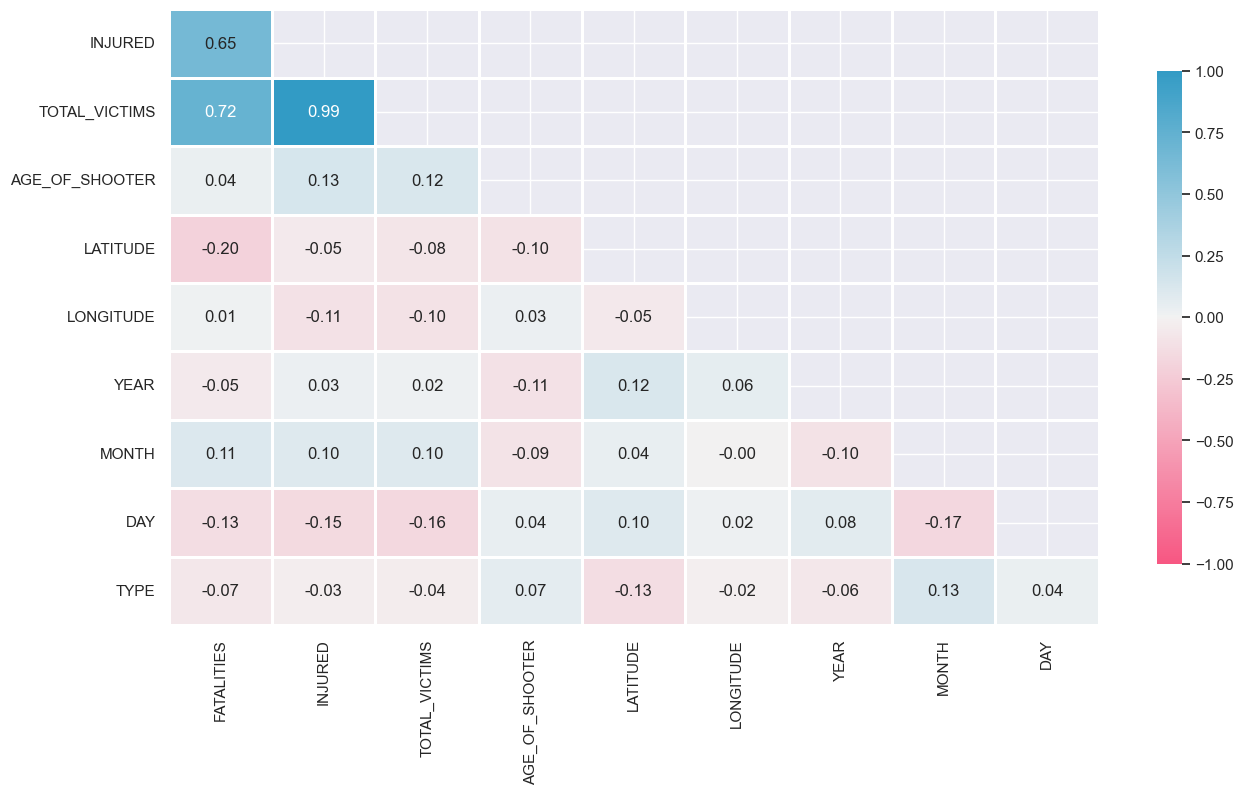

In [52]:
from sklearn.preprocessing import LabelEncoder

# 1- Before computing the correlation matrix, I must encode the target
encoder = LabelEncoder()
df_num_temp['type'] = encoder.fit_transform(df_num_temp['type'])

# Compute correlation matrix
mtx_corr = df_num_temp.corr()

# Create correlation heatmap plot:
fig, ax = plt.subplots(figsize=(15, 8))

# mask
mask = np.triu(np.ones_like(mtx_corr, dtype=bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = mtx_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)        # <---------- Diverging palette using "husl" color system

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           linewidths=1, cmap=cmap, vmin=-1, vmax=1,
           cbar_kws={"shrink": .8})
# , square=True)

# customize ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]

plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation = 90);

Very high correlation between variables:
- `fatalities` and `total_victims` (0.72)
- `injured` and `total_victims` (0.99)
- `fatalities` and `injured` (0.65)

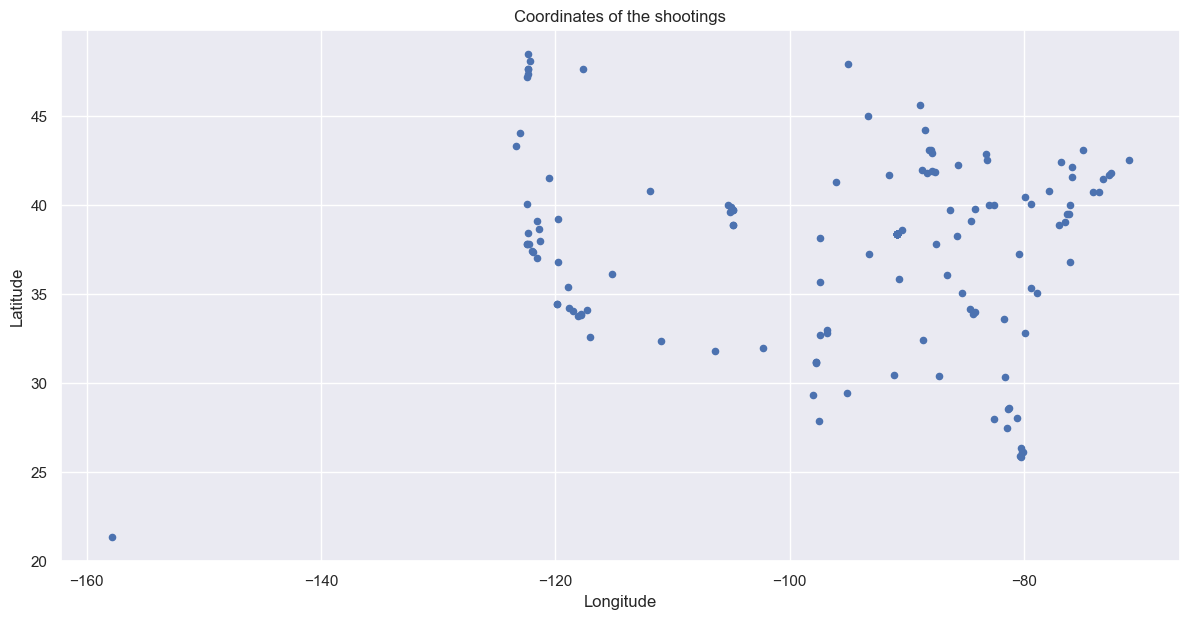

In [53]:
fig, ax = plt.subplots(figsize = [12,6])
fig.tight_layout()

df_num_temp.plot(kind = 'scatter',
                 x = 'longitude',
                 y = 'latitude',
                 marker = 'o',
                 # s = 0.1,
                 ax=ax)

ax.set(title = 'Coordinates of the shootings',
xlabel = 'Longitude',
ylabel = 'Latitude');

In [54]:
df.loc[df_num['longitude'] < -140, :]

,case,location,date,summary,fatalities,injured,total_victims,place,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
118,Xerox killings,"Honolulu, Hawaii",11/2/1999,"Byran Koji Uyesugi, 40, a Xerox service techni...",7,0,7,Workplace,40,Yes,"A psychiatrist, testifying for the prosecutio...",Yes,Hunting Supplies of Hawaii (The Armory) in Hon...,One semiautomatic handgun,9mm Glock 17 semiautomatic handgun,Asian,Male,http://archives.starbulletin.com/2000/06/02/ne...,http://archives.starbulletin.com/2000/06/02/ne...,http://archives.starbulletin.com/2000/06/02/ne...,21.320063,-157.876462,spree,1999


The outlier dot corresponds to a shooting in Hawaii, the only one in that location.

4. **Save cleaned dataset**

In [55]:
file_path = 'df_num_cleaned.pkl'           # <--- Define a file path and name

with open(file_path, 'wb') as file:
    pickle.dump(df_num, file)

## 1.3 Categorical Data

Categorical Data
- prior_signs_mental_health-issues
- weapons_obtained_legally
- gender

In [56]:
df_cat = df[['prior_signs_mental_health_issues', 'weapons_obtained_legally', 'gender']]

1. **Data Overview**

In [57]:
df['prior_signs_mental_health_issues'].value_counts()

prior_signs_mental_health_issues
Yes         58
-           29
Unclear     23
No          17
yes         14
TBD          5
Unknown      1
Unclear      1
Name: count, dtype: int64

Since there are two categories with the same name, I will check for a whitespace in the string 'Unclear':

In [58]:
mask = df['prior_signs_mental_health_issues'] == 'Unclear '
cat_lengths = df.loc[mask, 'prior_signs_mental_health_issues'].str.len()

print(cat_lengths)

144    8
Name: prior_signs_mental_health_issues, dtype: int64


- Replace 'Yes' by 'yes'
- Replace '-', 'Unclear', 'Unclear ', 'TBD', and 'Unknown' by 'unknown'
- Lower case all categories left

In [59]:
df['weapons_obtained_legally'].value_counts()

weapons_obtained_legally
Yes                                                                                                                                    81
-                                                                                                                                      18
No                                                                                                                                     16
yes                                                                                                                                    15
TBD                                                                                                                                     7
Unknown                                                                                                                                 6
\nYes                                                                                                                                   2
Kelley pa

I will search for the index of the string 'Kelley passed.....'

In [60]:
index_of_category = df['weapons_obtained_legally'].value_counts().index.get_loc('Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI')

index_of_category

7

- Replace 'TBD', '-', and 'Kelley...' by 'Unknown'
- Replace 'Yes ("some...', '\nYes', and 'yes' by 'Yes'
- Lower case all categories left

In [61]:
df['gender'].value_counts()

gender
M                                                                                                                                                                        72
Male                                                                                                                                                                     70
Male & Female                                                                                                                                                             2
Female                                                                                                                                                                    2
F ("identifies as transgender" and "Audrey Hale is a biological woman who, on a social media profile, used male pronouns,” according to Nashville Metro PD officials)     1
F                                                                                                                                    

Before making a decision, I will analize closer the rows corresponding to 'Male & Female':

In [62]:
df.loc[df['gender'] == 'Male & Female',:]

,case,location,date,summary,fatalities,injured,total_victims,place,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
31,Jersey City kosher market shooting,"Jersey City, New Jersey",12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,-,-,-,semiautomatic rifle; shotgun; semiautomatic ha...,AR-15-style rifle; Mossberg 12-gauge shotgun; ...,Black,Male & Female,https://www.nytimes.com/2019/12/15/nyregion/je...,-,-,40.707363,-74.083609,spree,2019
70,San Bernardino mass shooting,"San Bernardino, California",12/2/2015,Syed Rizwan Farook left a Christmas party held...,14,21,35,\nWorkplace,28,Unclear,Unclear,\nYes,The suspects purchased their handguns in the U...,Two assault rifles and two semi-automatic pist...,Two semiautomatic AR-15-style rifles—one a DPM...,Other,Male & Female,http://www.motherjones.com/mojo/2015/12/san-be...,-,http://www.motherjones.com/mojo/2015/12/san-be...,34.075961,-117.27789,mass,2015


I will keep the 'Male & Female' gender in both incidences, since there were two shooters with different genders each time.

- Replace 'M' by 'male'
- Replace 'F' and 'F (...' by 'female'
- Replace 'Male & Female' by 'male_and_female'
- Lower case all categories left

2. **Data Cleaning**

In [63]:
def cat_cleaning(df):

    # 'prior_signs_mental_health_issues' -------------------------------------------------------
    df['prior_signs_mental_health_issues'].replace(to_replace = ['-', 'Unclear', 'Unclear ', 'TBD'],
                                                   value = 'unknown',
                                                   inplace = True)

    df['prior_signs_mental_health_issues'].replace(to_replace = ['Yes'],
                                                   value = 'yes',
                                                   inplace = True)

    # 'weapons_obtained_legally' ----------------------------------------------------------------
    df['weapons_obtained_legally'].replace(to_replace = ['-',
                                                         'Unclear',
                                                         'TBD',
                                                         'Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI'],
                                        value = 'unknown',
                                        inplace = True)

    df['weapons_obtained_legally'].replace(to_replace = ['\nYes',
                                                         'yes',
                                                         'Yes ',
                                                         'Yes ("some of the weapons were purchased legally and some of them may not have been")'],
                                        value = 'Yes',
                                        inplace = True)

    # 'gender' ---------------------------------------------------------------------------------------
    df['gender'].replace({'M': 'Male',
                          'F':'Female',
                          'F ("identifies as transgender" and "Audrey Hale is a biological woman who, on a social media profile, used male pronouns,” according to Nashville Metro PD officials)': 'Female',
                          'Male & Female': 'male_and_female'},
                         inplace = True)

    # Lower casing all the categories in the categorical columns -------------------------------------
    for col in ['prior_signs_mental_health_issues', 'weapons_obtained_legally', 'gender']:
        df[col] = df[col].str.lower()

    return df

In [64]:
df_cat = cat_cleaning(df_cat)

In [65]:
df_cat

,prior_signs_mental_health_issues,weapons_obtained_legally,gender
0,yes,unknown,male
1,yes,yes,male
2,unknown,unknown,male
3,yes,yes,male
4,yes,yes,male
5,yes,yes,male
6,yes,yes,male
7,unknown,yes,female
8,unknown,yes,male
9,unknown,unknown,male


3. **Data Visualization**

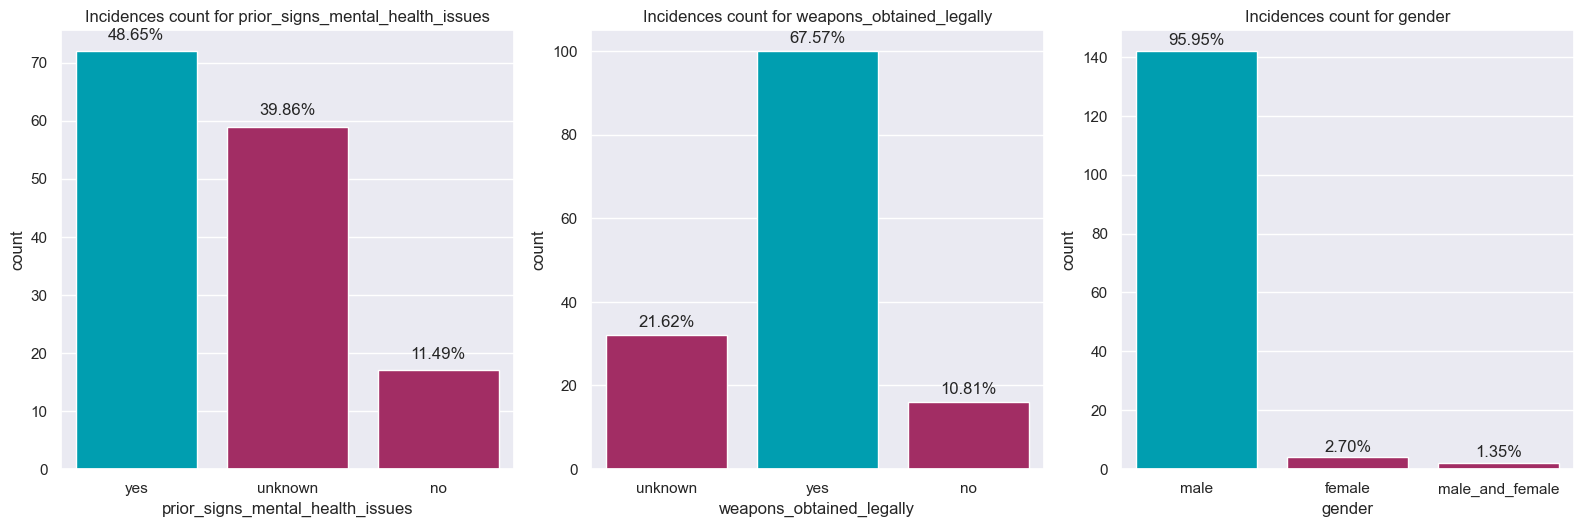

In [66]:
plt.figure(figsize = (16,10))

for i, col in enumerate(df_cat.columns):
    plt.subplot(2, 3, i+1)
    plt.gca().set_title('Incidences count for {}'.format(col))
#     plt.gca().set_yscale('log')
    counts = sns.countplot(data = df_cat,
                           x = col,
                           color = '#b51963')

    if col == 'race':
        counts.set_xticklabels(counts.get_xticklabels(), rotation=45)

#   Placing the count (high of the bar) at each bar in the barplot
    for i, patch in enumerate(counts.patches):
          counts.annotate('{:.2f}%'.format(100* patch.get_height() / len(df_cat)), (patch.get_x() + patch.get_width() / 2, patch.get_height() + 2), ha = 'center')

# Highlight the bar the maximum count of reservations
    patch_c = [patch.get_height() for patch in counts.patches]  # <--------- list with the hights of the bars
    idx_tallest = np.argmax(patch_c)                          # <--------- get the index of the tallest bar
    counts.patches[idx_tallest].set_facecolor('#009eb0')          # <--------- modify the color of the tallest bar

plt.tight_layout()     # <------------- Adjust subplot spacing

plt.show;

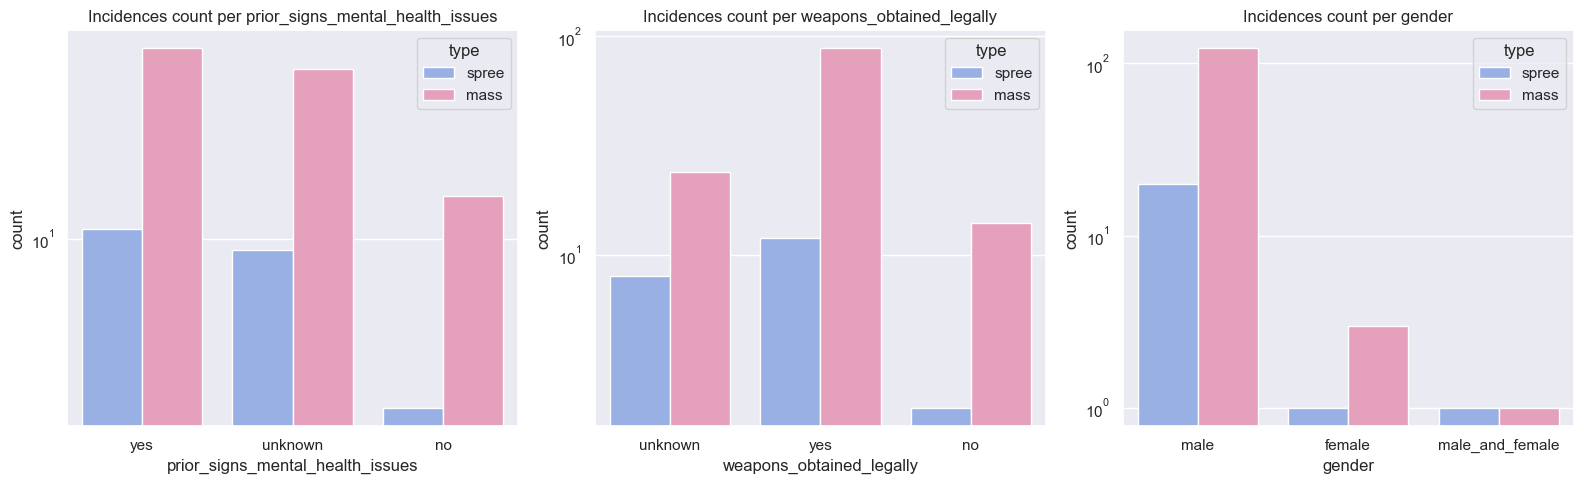

In [67]:
df_cat_temp = pd.concat([df_cat, df['type']], axis = 1)

plt.figure(figsize = (16,5))

# Set the color map for plots
colors = ['#8babf1', '#f194b8']

for i, col in enumerate(df_cat.columns):
    plt.subplot(1, 3, i+1)
    plt.gca().set_title('Incidences count per {}'.format(col))
    plt.gca().set_yscale('log')
    sns.countplot(data = df_cat_temp,
                  x = col,
                  palette = colors,
                  hue = 'type' )

    # if col == 'room_type_reserved':
    #     counts.set_xticklabels(counts.get_xticklabels(), rotation=45)

plt.tight_layout()                   # Adjust subplot spacing
plt.show;

4. **Save cleaned dataset**

In [94]:
file_path = 'df_cat_cleaned.pkl'           # <--- Define a file path and name

with open(file_path, 'wb') as file:
    pickle.dump(df_cat, file)

6. Model Selection:
    - Choose an appropriate machine learning model for text classification based on the features you have prepared.

7. Train and Evaluate the Model:
    - Split your data into training and testing sets. Train the model on the training set and evaluate its performance on the testing set.

8. Hyperparameter Tuning:
    - Fine-tune the hyperparameters of your model to improve its performance.

9. Predict New Text:
    - Use the trained model to predict labels for new text data, considering the combined information.